In [94]:
# importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [95]:
# importing CSV files using glob

# importing all the csv files in the project directory using glob and regex to find the relevant files
# * is a regex quantifier which enables one to select the preceeding character 0 or more times
# im not exactly sure why this quantifer was able to select files states.csv 0 - 9
# I tried using other regex expressions however the kleene star was the one which worked

files = glob.glob('states*.csv')

In [96]:
# creating a dataframe from the files using pandas and pd.concat to combine the dataframes into one dataframe

dataframes = []
for filename in files:
    data = pd.read_csv(filename)
    dataframes.append(data)
    
us_census = pd.concat(dataframes)

In [97]:
# copy of dataframe
# this is the dataframe I will be editing throughout the project
census_data = us_census.copy()

In [98]:
# Remove the $ in the income column
census_data['Income'] = census_data['Income'].apply(lambda x: x.replace('$', ''))

# convert data to a float
census_data['Income'] = pd.to_numeric(census_data['Income'])
# round data to 2 decimals since we are dealing with money
census_data['Income'] = census_data['Income'].round(2)
# rename income column to Income $
census_data = census_data.rename(columns={'Income': 'Income ($)'})

In [99]:
# deleted the column unnamed: 0 from the dataframe
census_data_edited = census_data.drop(columns='Unnamed: 0')

# deleted the duplicated rows and reset_index
census_data_edited_2 = census_data_edited.drop_duplicates().reset_index()
census_data_edited_3 = census_data_edited_2.drop(columns='index')

In [100]:
# Split the genderpop column into a series containing a list with two indexes male and female
genpop_series = census_data_edited_3['GenderPop'].str.split('_')

# Adding Male Population and Female Population columns to dataframe
census_data_edited_3['Male Population'] = genpop_series.str[0]
census_data_edited_3['Female Population'] = genpop_series.str[1]

# Removing the genderpop column
census_data_edited_4 = census_data_edited_3.drop(columns='GenderPop')


# Remove 'M' and 'F' from gender columns and convert them to int from strings
census_data_edited_4['Male Population'] = census_data_edited_4['Male Population'].apply(lambda x: x.replace('M', ''))
census_data_edited_4['Female Population'] = census_data_edited_4['Female Population'].apply(lambda x: x.replace('F', ''))

census_data_edited_4['Male Population'] = pd.to_numeric(census_data_edited_4['Male Population'])
census_data_edited_4['Female Population'] = pd.to_numeric(census_data_edited_4['Female Population'])

# Fill mising values in female population columns

census_data_edited_5 = census_data_edited_4.fillna(value={
    'Female Population': census_data_edited_4['TotalPop'] - census_data_edited_4['Male Population']
})


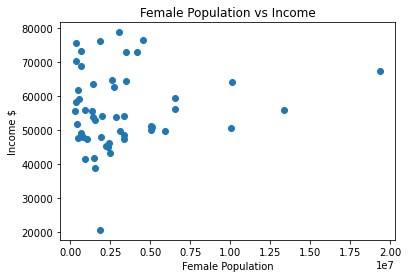

In [101]:
# Scatterplot of Female Population vs Income

plt.scatter(census_data_edited_5['Female Population'],census_data_edited_5['Income ($)'])
plt.title('Female Population vs Income')
plt.xlabel('Female Population')
plt.ylabel('Income $')
plt.show()

In [102]:
# Changing variable for easier typing

data = census_data_edited_5.copy()

# Removing % from demographic columns

data.Hispanic = data.Hispanic.str[:-1]
data.White = data.White.str[:-1]
data.Black = data.Black.str[:-1]
data.Native = data.Native.str[:-1]
data.Asian = data.Asian.str[:-1]
data.Pacific = data.Pacific.str[:-1]

# Converting demographic columns to numerical and rounding to 2 decimals

data.Hispanic = pd.to_numeric(data.Hispanic).round(2)
data.White = pd.to_numeric(data.White).round(2)
data.Black = pd.to_numeric(data.Black).round(2)
data.Native = pd.to_numeric(data.Native).round(2)
data.Asian = pd.to_numeric(data.Asian).round(2)
data.Pacific = pd.to_numeric(data.Pacific).round(2)

# Fill NaN values in Pacific column

data = data.fillna(value={
    'Pacific': (100 - (data.Hispanic + data.White + data.Black + data.Native + data.Asian)).round(2)
})



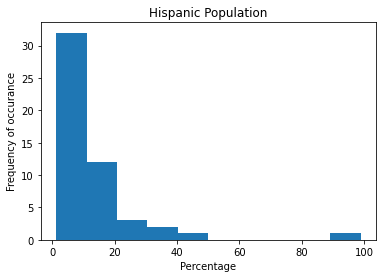

In [103]:
# Histograms for demographic columns

plt.hist(data.Hispanic)
plt.title('Hispanic Population')
plt.xlabel('Percentage')
plt.ylabel('Frequency of occurance')
plt.show()

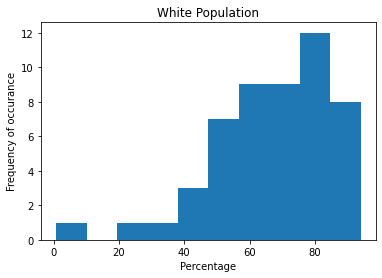

In [104]:
plt.hist(data.White)
plt.title('White Population')
plt.xlabel('Percentage')
plt.ylabel('Frequency of occurance')
plt.show()

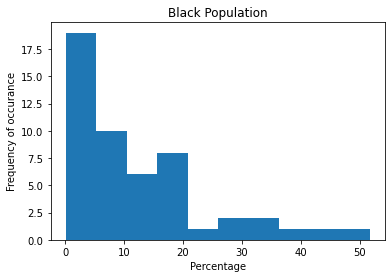

In [105]:
plt.hist(data.Black)
plt.title('Black Population')
plt.xlabel('Percentage')
plt.ylabel('Frequency of occurance')
plt.show()

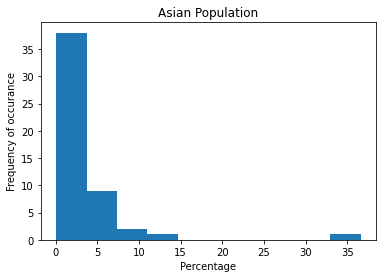

In [106]:
plt.hist(data.Asian)
plt.title('Asian Population')
plt.xlabel('Percentage')
plt.ylabel('Frequency of occurance')
plt.show()

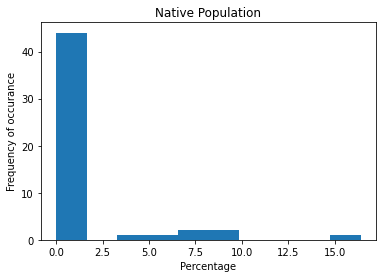

In [107]:
plt.hist(data.Native)
plt.title('Native Population')
plt.xlabel('Percentage')
plt.ylabel('Frequency of occurance')
plt.show()

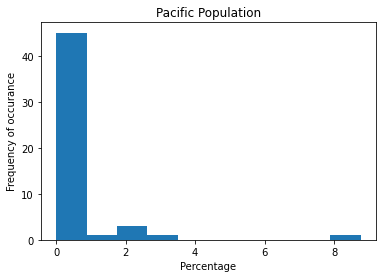

In [93]:
plt.hist(data.Pacific)
plt.title('Pacific Population')
plt.xlabel('Percentage')
plt.ylabel('Frequency of occurance')
plt.show()